In [14]:
# %load simple_nerual_network.py
#!/usr/bin/env python2
"""
Created on Tue Nov 14 12:19:13 2017

@author: tjian
"""
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

X 输入：
$
        \begin{bmatrix}
        0 & 0 & 1 \\
        1 & 1 & 1 \\
        1 & 0 & 1 \\
        0 & 1 & 1 \\
        \end{bmatrix}
$
  Y 输出：
$
        \begin{bmatrix}
        0  \\
        1  \\
        1  \\
        0  \\
        \end{bmatrix}
$



In [15]:
# 读入 x 和 y
x1 = np.array([0,0,1])
x2 = np.array([1,1,1])
x3 = np.array([1,0,1])
x4 = np.array([0,1,1])
X = np.array([x1,x2,x3,x4])
Y = np.array([[0,1,1,0]])
Y = Y.T
print X,X.shape;Y,Y.shape

[[0 0 1]
 [1 1 1]
 [1 0 1]
 [0 1 1]] (4, 3)


(array([[0],
        [1],
        [1],
        [0]]), (4, 1))

X 转置：
$
        \begin{bmatrix}
        0 & 1 & 1 & 0\\
        0 & 1 & 0 & 1\\
        1 & 1 & 1 & 1\\
        \end{bmatrix}
$

In [16]:

# X转置
X1t = X.T
print X1t,X1t.shape

[[0 1 1 0]
 [0 1 0 1]
 [1 1 1 1]] (3, 4)


In [17]:
# 随机weight 
W = 2*np.random.rand(3,1) - 1
print W, W.shape

[[-0.81047546]
 [ 0.28539929]
 [-0.20297838]] (3, 1)


P是输出 $ P = \sigma{(X{\oplus}W)}$ 其中：$\oplus$是点乘（dot），$\star$是相乘

In [ ]:
def _sigmoid(x):
    return 1/(1+np.exp(-x))

In [18]:
 
#P = 1/(1+np.exp(-X.dot(W)))
P = _sigmoid(X.dot(W))

> $sigmoid函数：\sigma(z)=\frac{1}{1 + e^{-z}}$

> 损失函数（方差）：$L(w)=\frac{(Y-P)^2}{2}=\frac{(Y - \sigma{(X*W)})^2}{2} = \frac{(Y - \sigma{(z)})^2}{2}, 其中：z=X{\otimes}W$

> $w_1 \leftarrow w_0-\eta\frac{\partial{L}}{\partial{w}}$

> $w_2 \leftarrow w_1-\eta\frac{\partial{L}}{\partial{w}}$

> $ \frac{\partial{L}}{\partial{w}} = {(\frac {(Y - \sigma{(z)})^2}{2})}{'} $

> $ \bigl((Y - \sigma(z))^2\bigr){'} = \biggl(\bigl(Y^2 - 2*Y*{\sigma}(z) + {\sigma}^2(z)\bigr)\biggr){'}
  = 0 - \bigl(2*Y*{\sigma}(z)\bigr){'} + \bigl({\sigma}^2(z)\bigr){'}
  = -\bigl(2*Y*{\sigma}(z)\bigr){'} + \bigl({\sigma}^2(z)\bigr){'} \space\space (1-1)$
  
> 根据链式法则：$ \biggl(f\bigl(g(x)\bigr)\biggr){'} = f{'}\bigl(g(x)\bigr)*g{'}(x)$
  
> $ \bigl(\sigma(z)\bigr){'} = \sigma{'}(z)\star z{'} \space \space 其中：z = X{\star}W \space \space \frac{{\partial}z}{{\partial}w} = X \space \space 所以： \sigma{'}(z)\star z{'} = \sigma{'}(z)\star X$

> $ \bigl({\sigma}^2(z)\bigr){'} = \bigl(\sigma(z)\star\sigma(z)\bigr) \space\space 因为：\bigl(u(x)\star v(x)\bigr){'}   = u{'}(x)*v(x) + u(x)*v{'}(x) \space\space 所以：\bigl({\sigma}^2(z)\bigr){'} = 2*X*\sigma{'}(z)*\sigma(z)$

> $(1-1)式 \to -2\star Y\star X\star\sigma{'}(z) + 2\star X\star\sigma{'}(z)\star\sigma(z) = 
  -2\star X\star\sigma{'}(z)\star \bigl(Y - \sigma(z)\bigr)$
  
> $ \frac{\partial{L}}{\partial{w}} = {(\frac {(Y - \sigma{(z)})^2}{2})}{'} = \frac{-2\star X\star\sigma{'}(z)\star \bigl(Y - \sigma(z)\bigr)}{2} = -X\star\sigma{'}(z)\star \bigl(Y - \sigma(z)\bigr) $

> $w_1 \leftarrow w_0-\eta\frac{\partial{L}}{\partial{w}} \leftarrow\rightarrow  w_1 \leftarrow w_0+\eta \star X\star\sigma{'}(z)\star \bigl(Y - \sigma(z)\bigr)$

> $w_2 \leftarrow w_1-\eta\frac{\partial{L}}{\partial{w}} \leftarrow\rightarrow  w_2 \leftarrow w_1+\eta \star X\star\sigma{'}(z)\star \bigl(Y - \sigma(z)\bigr)$

> $特别地：令：\eta=1  \space\space 所以：W = W + X\star\sigma{'}(z)\star \bigl(Y - \sigma(z)\bigr)$

> $\sigma{'}(z) = \sigma(z)*(1 - \sigma(z)) $

> $下式中：P = \sigma(z) \space\space而：z=X\otimes W $
 
> $d(A*x)/dx=A$            
$d(x^T*A)/dx^T=A$   
$d(x^T*A)/dx=A^T$    
$d(x^T*A*x)/dx=x^T(A^T+A)$

> https://en.wikipedia.org/wiki/Matrix_calculus#Vector-by-scalar


x is a column vector, A is a matrix

$d(A*x)/dx=A$            

$d(x^T*A)/dx^T=A$   

$d(x^T*A)/dx=A^T$    

$d(x^T*A*x)/dx=x^T(A^T+A)$

In [19]:
W += X1t.dot(P*(1-P)*(Y-P))

In [20]:
lost = []

In [21]:
for i in range(1000):
    P = 1/(1 + np.exp(-X.dot(W)))
    W += X1t.dot(P*(1-P)*(Y-P))
    L = (Y - P)**2/2
    lost.append(L.sum())

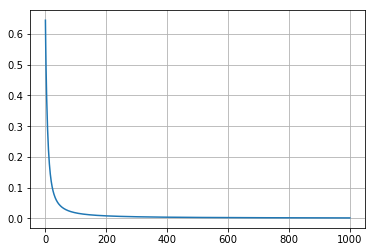

In [22]:
# 画出lost
plt.plot(range(1000),lost)
plt.grid()

In [23]:
L

array([[ 0.00050918],
       [ 0.00033641],
       [ 0.00021892],
       [ 0.00033213]])

In [26]:
X_pre = np.array([1,0,0])

In [29]:
1/(1+np.exp(-X_pre.dot(W)))

array([ 0.99929677])